In [12]:
import os
import os.path as osp
import sys
sys.path.append('/home/damon/Documents/')
import numpy as np
import torch, torchvision
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from torchsummary import summary

from torchviz import make_dot, make_dot_from_trace
import torch
import torchvision
import torchvision.transforms as transforms

import mmdet
import mmcv
import deformable as D

In [ ]:
cfg ='work_dirs/valdir/ssd512res_atrous.py'
cfg = mmcv.Config.fromfile(cfg)
cfg.load_from = 'work_dirs/valdir/latest.pth'
from mmdet.models import build_detector
model = build_detector(cfg.model, train_cfg=None, test_cfg=cfg.test_cfg)

mmcv.runner.checkpoint.load_checkpoint(model, cfg.load_from)

In [ ]:
ds = mmdet.datasets.get_dataset(cfg.data.test)

In [ ]:
xs = ds[0]
img = xs['img'][0].unsqueeze(0)
img_meta = xs['img_meta'][0]

In [ ]:
model.eval()
x = model.extract_feat(img)
outs = model.bbox_head(x)

In [ ]:
cls, _ = outs

In [ ]:
for level in cls:
    scores = level.view(level.size(1), -1)
    print(scores.shape)
    print(scores.mean())
#     print(torch.topk(level, 5))
#     print(level.top())

In [ ]:
[v.shape for v in cls]

In [ ]:
x = torch.zeros(3,1024,7, 7)

In [ ]:
op = nn.AvgPool2d??

In [ ]:
op = nn.AvgPool2d

In [ ]:
y =op(x)

In [ ]:
y.shape

In [27]:
import os
import os.path as osp
from utility import Inspector

In [77]:
import numpy as np

import pickle
import torch

import sys

In [119]:
dc = Inspector.load_dict('box.pkl')
all_boxes = dc['box']

cls = [[] for _ in range(10)]

for boxes in all_boxes: # each image
    for i, b in enumerate(boxes[0]): # each class
        if np.ndim(b) != 2:
            b = b[None, :]
        cls[i].append(b[..., :4])
for i in range(10):
    cls[i] = np.concatenate(cls[i], 0).mean(1).astype(np.int64)

In [120]:
[v.shape for v in cls]

[(139052,),
 (15428,),
 (7818,),
 (78187,),
 (5088,),
 (8233,),
 (3133,),
 (1492,),
 (545,),
 (15024,)]

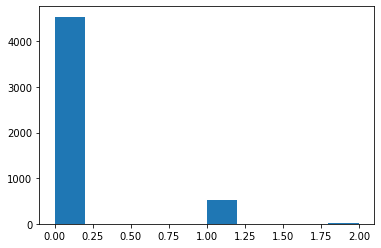

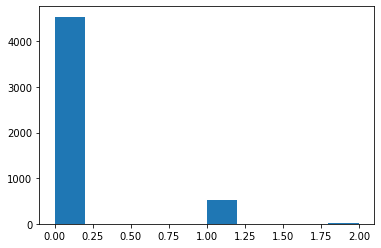

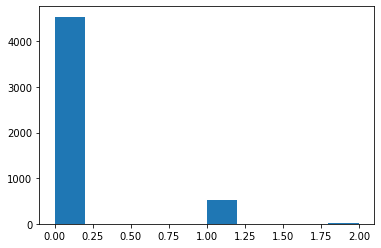

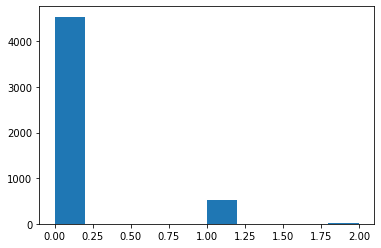

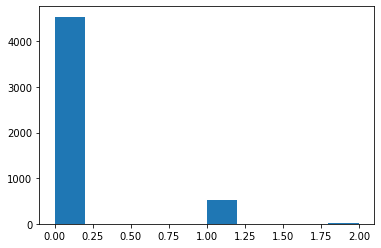

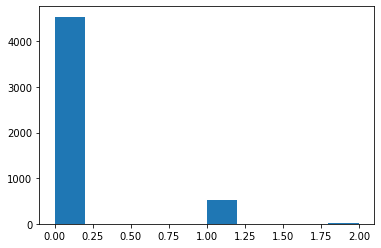

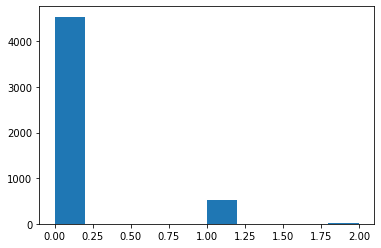

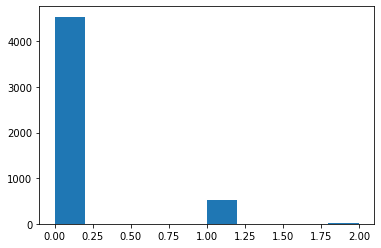

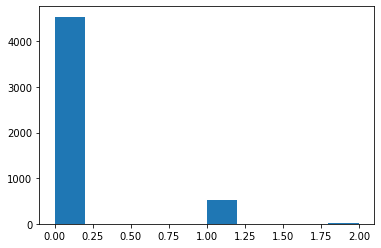

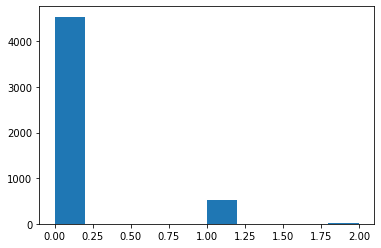

In [125]:
for i in range(10):
    plt.hist(cls[4], bins=10)
    plt.show()

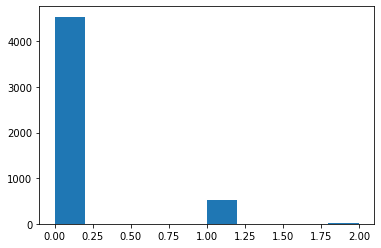

In [123]:
plt.hist(cls[4], bins=10)
plt.show()